In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('daily_avg.csv')
df.head()

,Date_Time,SO2 (ppb),NOx (ppb),CO (ppm),CO (8hr),O3,O3 (8hr),PM2.5 (ug/m3),PM10 (ug/m3),PM2.5_subindex,PM10_subindex,SO2_subindex,NOx_subindex,CO_subindex,O3_subindex,Checks,AQI_calculated,AQI_bucket_calculated
0,2013-01-01 11:30:00.000000000,12.557917,78.851304,2.261000,2.60125,4.500000,7.19625,258.470476,372.176875,406.515751,327.721094,15.697396,98.564130,107.515625,7.19625,6,407.0,Severe
1,2013-01-02 11:30:00.000000000,49.263750,90.861667,2.052083,2.37250,5.193333,9.68875,309.099583,440.492917,445.461218,413.116146,61.579687,110.861667,104.656250,9.68875,6,445.0,Severe
2,2013-01-03 11:30:00.000000000,27.795417,41.032632,0.802500,1.27500,16.061250,37.32500,141.596087,294.745833,316.612375,244.745833,34.744271,51.290789,63.750000,37.32500,6,317.0,Very Poor
3,2013-01-04 11:30:00.000000000,6.973913,12.170870,0.170588,0.26800,5.864545,9.43000,50.000000,111.009000,83.333333,107.339333,8.717391,15.213587,13.400000,9.43000,6,107.0,Moderate
4,2013-01-05 11:30:00.000000000,11.516667,18.224444,0.018333,0.05000,8.751667,14.66875,31.025556,91.124118,51.709259,91.124118,14.395833,22.780556,2.500000,14.66875,6,91.0,Satisfactory


In [21]:
df.dropna(subset=['AQI_calculated'],inplace=True)

In [22]:
df_con = df[['SO2 (ppb)', 'NOx (ppb)', 'CO (ppm)', 'O3', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'AQI_calculated']].copy()
df_con.head()

,SO2 (ppb),NOx (ppb),CO (ppm),O3,PM2.5 (ug/m3),PM10 (ug/m3),AQI_calculated
0,12.557917,78.851304,2.261000,4.500000,258.470476,372.176875,407.0
1,49.263750,90.861667,2.052083,5.193333,309.099583,440.492917,445.0
2,27.795417,41.032632,0.802500,16.061250,141.596087,294.745833,317.0
3,6.973913,12.170870,0.170588,5.864545,50.000000,111.009000,107.0
4,11.516667,18.224444,0.018333,8.751667,31.025556,91.124118,91.0


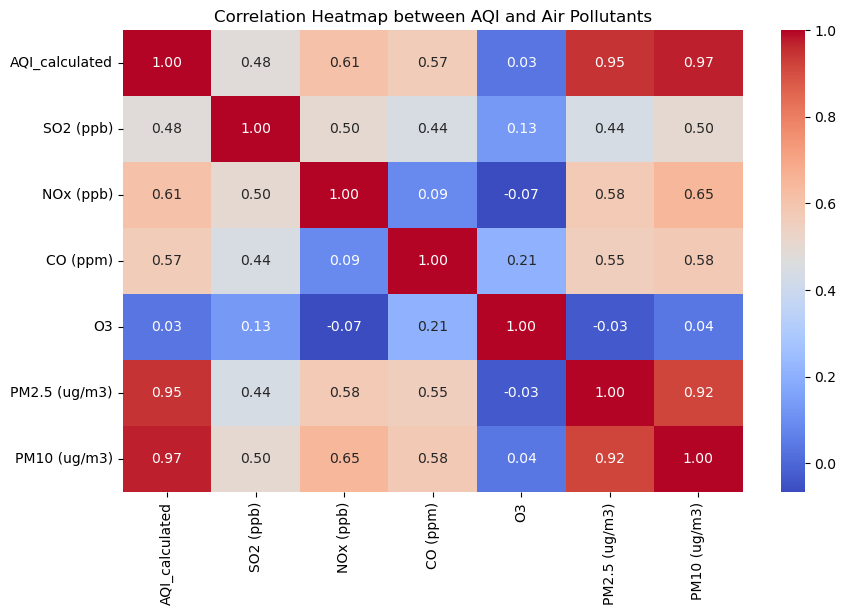

In [23]:
# Calculate the correlation matrix
correlation_matrix = df_con[['AQI_calculated', 'SO2 (ppb)', 'NOx (ppb)', 'CO (ppm)', 'O3', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between AQI and Air Pollutants')
plt.show()

In [24]:
df_aqi = df[['PM2.5_subindex', 'PM10_subindex', 'SO2_subindex', 'NOx_subindex', 'O3_subindex', 'CO_subindex', 'AQI_calculated']].copy()
df_aqi.head()

,PM2.5_subindex,PM10_subindex,SO2_subindex,NOx_subindex,O3_subindex,CO_subindex,AQI_calculated
0,406.515751,327.721094,15.697396,98.564130,7.19625,107.515625,407.0
1,445.461218,413.116146,61.579687,110.861667,9.68875,104.656250,445.0
2,316.612375,244.745833,34.744271,51.290789,37.32500,63.750000,317.0
3,83.333333,107.339333,8.717391,15.213587,9.43000,13.400000,107.0
4,51.709259,91.124118,14.395833,22.780556,14.66875,2.500000,91.0


## Splitting the dataset into dependent and independent set

In [25]:
# X = df_con[['SO2 (ppb)', 'NOx (ppb)', 'CO (ppm)', 'O3', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)']]
# Y = df_con['AQI_calculated']

X = df_aqi[['PM2.5_subindex', 'PM10_subindex', 'SO2_subindex', 'NOx_subindex', 'O3_subindex', 'CO_subindex']]
Y = df_aqi['AQI_calculated']

In [26]:
# model import from sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, accuracy_score,confusion_matrix

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

In [28]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1148, 6) (288, 6) (1148,) (288,)


## Decision tree regression  

In [29]:
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [30]:
# train predicts
y_train_pred = DT_model.predict(X_train)
# test predicts
y_test_pred = DT_model.predict(X_test)

In [31]:
mae_train = mean_absolute_error(Y_train, y_train_pred)
mae_test = mean_absolute_error(Y_test, y_test_pred)
print(mae_train, mae_test)

0.0 1.7743055555555556


In [32]:
mse_train = mean_squared_error(Y_train, y_train_pred)
mse_test = mean_squared_error(Y_test, y_test_pred)
print(mse_train, mse_test)

0.0 29.322916666666668


In [33]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(rmse_train, rmse_test)

0.0 5.415063865428244


In [34]:
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)
print(r2_train, r2_test)

1.0 0.9983917710210277


In [35]:
accuracy_train = accuracy_score(Y_train, y_train_pred)
accuracy_test = accuracy_score(Y_test, y_test_pred)
print(accuracy_train, accuracy_test)

1.0 0.5555555555555556


## Random Forest

In [36]:
RF_model = RandomForestRegressor()
RF_model.fit(X_train, Y_train)

RandomForestRegressor()

In [37]:
# train predicts
y_train_pred = RF_model.predict(X_train)
# test predicts
y_test_pred = RF_model.predict(X_test)

In [38]:
mae_train = mean_absolute_error(Y_train, y_train_pred)
mae_test = mean_absolute_error(Y_test, y_test_pred)
print(mae_train, mae_test)

0.9354529616724736 1.513263888888889


In [39]:
mse_train = mean_squared_error(Y_train, y_train_pred)
mse_test = mean_squared_error(Y_test, y_test_pred)
print(mse_train, mse_test)

13.511602439024399 14.696505555555555


In [40]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(rmse_train, rmse_test)

3.675813167045409 3.8336021644864973


In [41]:
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)
print(r2_train, r2_test)

0.9992748660745099 0.999193963329339


# XGBoost

In [42]:
from xgboost import XGBRegressor
XG_Model = XGBRegressor()
XG_Model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [43]:
# train predicts
y_train_pred = XG_Model.predict(X_train)
# test predicts
y_test_pred = XG_Model.predict(X_test)

In [44]:
mae_train = mean_absolute_error(Y_train, y_train_pred)
mae_test = mean_absolute_error(Y_test, y_test_pred)
print(mae_train, mae_test)

0.2358277533527866 2.5815667046440973


In [45]:
mse_train = mean_squared_error(Y_train, y_train_pred)
mse_test = mean_squared_error(Y_test, y_test_pred)
print(mse_train, mse_test)

0.10615558135828551 20.699373347868434


In [46]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(rmse_train, rmse_test)

0.3258152564848453 4.549656398879858


In [47]:
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)
print(r2_train, r2_test)

0.999994302895325 0.9988647332581874


# LightGBM

In [48]:
from lightgbm import LGBMRegressor
Light_Model = LGBMRegressor()
Light_Model.fit(X_train, Y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1482
[LightGBM] [Info] Number of data points in the train set: 1148, number of used features: 6
[LightGBM] [Info] Start training from score 218.071429


LGBMRegressor()

In [49]:
# train predicts
y_train_pred = Light_Model.predict(X_train)
# test predicts
y_test_pred = Light_Model.predict(X_test)

In [50]:
mae_train = mean_absolute_error(Y_train, y_train_pred)
mae_test = mean_absolute_error(Y_test, y_test_pred)
print(mae_train, mae_test)

3.160528926798533 4.262502956547103


In [51]:
mse_train = mean_squared_error(Y_train, y_train_pred)
mse_test = mean_squared_error(Y_test, y_test_pred)
print(mse_train, mse_test)

116.92808575574303 92.25566598807963


In [52]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(rmse_train, rmse_test)

10.813329078306229 9.60498131117805


In [53]:
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)
print(r2_train, r2_test)

0.9937247619439111 0.9949401951653369


# CatBoost

In [54]:
from catboost import CatBoostRegressor
Cat_Model = CatBoostRegressor()
Cat_Model.fit(X_train, Y_train)

Learning rate set to 0.041846
0:	learn: 131.6803912	total: 165ms	remaining: 2m 44s
1:	learn: 127.1639367	total: 172ms	remaining: 1m 25s
2:	learn: 122.8549867	total: 176ms	remaining: 58.5s
3:	learn: 118.4999993	total: 184ms	remaining: 45.9s
4:	learn: 114.2806954	total: 190ms	remaining: 37.9s
5:	learn: 110.1718345	total: 198ms	remaining: 32.8s
6:	learn: 106.5262364	total: 213ms	remaining: 30.3s
7:	learn: 102.9168641	total: 218ms	remaining: 27.1s
8:	learn: 99.6964301	total: 222ms	remaining: 24.5s
9:	learn: 96.2257693	total: 229ms	remaining: 22.6s
10:	learn: 93.2148230	total: 234ms	remaining: 21.1s
11:	learn: 90.0545948	total: 239ms	remaining: 19.6s
12:	learn: 87.2962969	total: 248ms	remaining: 18.8s
13:	learn: 84.3841958	total: 253ms	remaining: 17.8s
14:	learn: 81.5581344	total: 260ms	remaining: 17.1s
15:	learn: 78.9674852	total: 273ms	remaining: 16.8s
16:	learn: 76.5758185	total: 285ms	remaining: 16.5s
17:	learn: 74.0878989	total: 296ms	remaining: 16.1s
18:	learn: 71.8125194	total: 303ms

In [55]:
# train predicts
y_train_pred = Cat_Model.predict(X_train)
# test predicts
y_test_pred = Cat_Model.predict(X_test)

In [56]:
mae_train = mean_absolute_error(Y_train, y_train_pred)
mae_test = mean_absolute_error(Y_test, y_test_pred)
print(mae_train, mae_test)

1.4047897957756352 3.729864917493905


In [57]:
mse_train = mean_squared_error(Y_train, y_train_pred)
mse_test = mean_squared_error(Y_test, y_test_pred)
print(mse_train, mse_test)

3.2918206714594587 35.423315141689336


In [58]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(rmse_train, rmse_test)

1.8143375296398019 5.951748914536746


In [59]:
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)
print(r2_train, r2_test)

0.9998233362137262 0.9980571918343002
